In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

In [4]:
df = pd.read_csv("Fraud.csv")

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [10]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [11]:
df.isnull().sum().sum()

0

In [12]:
df.shape

(6362620, 11)

In [13]:
round((df["isFraud"].value_counts()[1]/df.shape[0])*100,2)

0.13

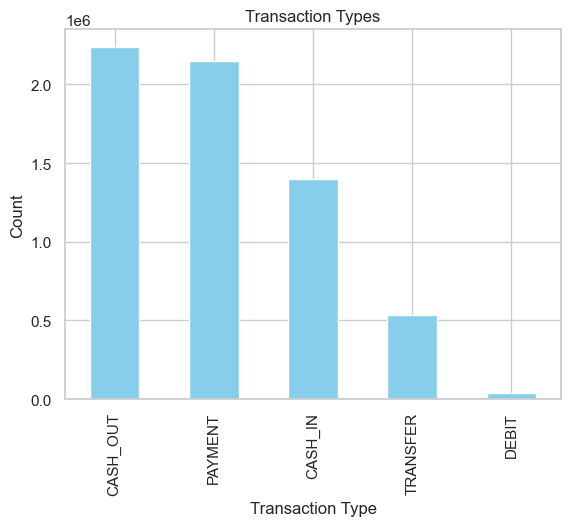

In [14]:
df["type"].value_counts().plot(kind="bar", title="Transaction Types", color="skyblue")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

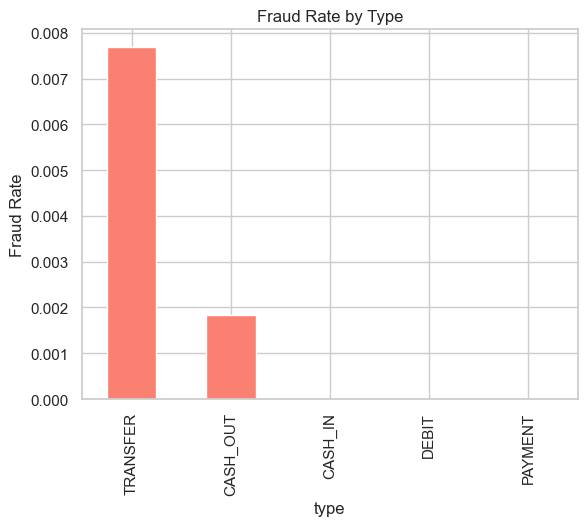

In [15]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", title="Fraud Rate by Type", color="salmon")
plt.ylabel("Fraud Rate")
plt.show()

In [16]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int32

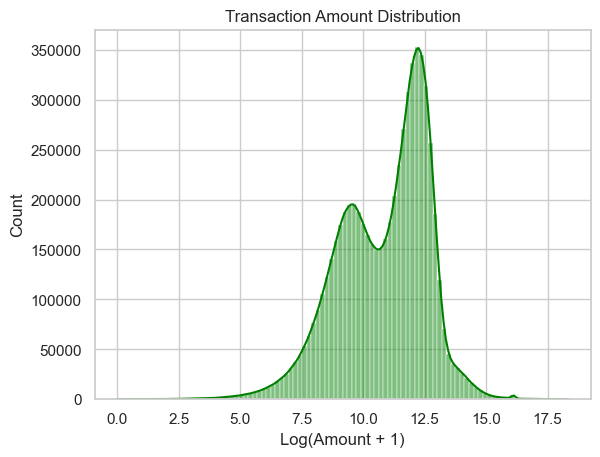

In [17]:
sns.histplot(np.log1p(df["amount"]), bins=100, kde=True, color="green")
plt.title("Transaction Amount Distribution")
plt.xlabel("Log(Amount + 1)")
plt.show()

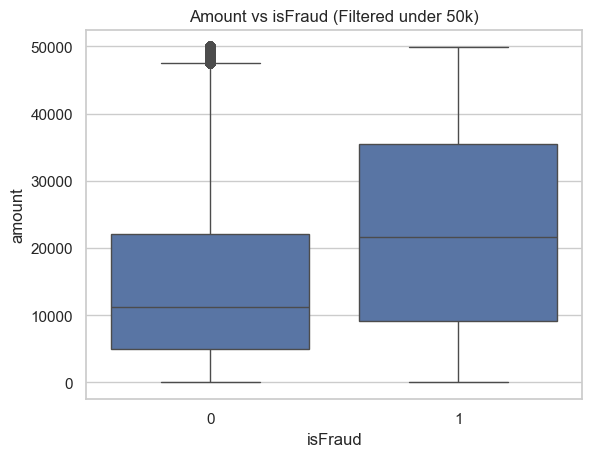

In [18]:
sns.boxplot(data=df[df["amount"] < 50000], x="isFraud", y="amount")
plt.title("Amount vs isFraud (Filtered under 50k)")
plt.show()

In [19]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [20]:
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [21]:
(df["balanceDiffOrig"] < 0).sum()

1399253

In [22]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


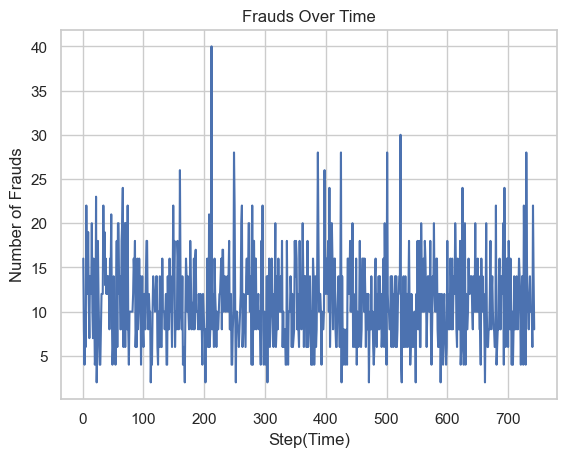

In [23]:
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label = "Frauds per Step")
plt.xlabel("Step(Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()

In [24]:
df.drop(columns="step", inplace=True)

In [25]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [26]:
top_senders = df["nameOrig"].value_counts().head(10)

In [27]:
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [28]:
top_recievers = df["nameDest"].value_counts().head(10)

In [29]:
top_recievers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [30]:
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)

In [31]:
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [32]:
fraud_types = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]

In [33]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

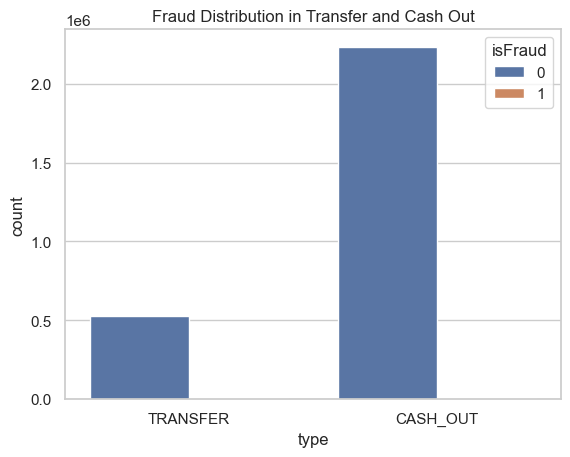

In [34]:
sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title("Fraud Distribution in Transfer and Cash Out")
plt.show()

In [35]:
corr = df[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "balanceDiffOrig", "balanceDiffDest", "isFraud"]].corr()

In [36]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,balanceDiffOrig,balanceDiffDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.102337,0.845964,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,-0.220297,-0.087032,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.267750,-0.094456,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.047460,0.232316,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,-0.006451,0.436191,0.000535
balanceDiffOrig,0.102337,-0.220297,-0.267750,-0.047460,-0.006451,1.000000,0.169292,0.362472
balanceDiffDest,0.845964,-0.087032,-0.094456,0.232316,0.436191,0.169292,1.000000,0.027028
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,0.362472,0.027028,1.000000


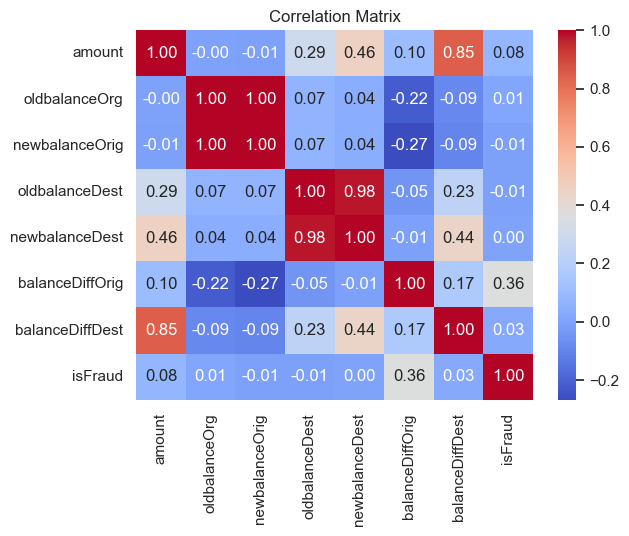

In [37]:
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [38]:
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"] == 0) &
    (df["type"].isin(["TRANSFER", "CASH_OUT"]))
]

In [39]:
len(zero_after_transfer)

1188074

In [40]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [41]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [43]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [44]:
df_model = df.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)

In [45]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [46]:
categorical_features = ["type"]
numeric_features = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [47]:
y = df_model["isFraud"]
X = df_model.drop("isFraud", axis=1)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [49]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop = "first"), categorical_features)
    ],
    remainder="drop"
)

In [50]:
pipeline = Pipeline(steps=[
    ("prep", preprocessor),
    ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
])

In [51]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [52]:
y_pred = pipeline.predict(X_test)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [54]:
confusion_matrix(y_test, y_pred)

array([[1804105,  102217],
       [    152,    2312]], dtype=int64)

In [55]:
pipeline.score(X_test, y_test)

0.9463695773124907

In [56]:
import joblib
joblib.dump(pipeline, "fraud_detection_model.pkl")

['fraud_detection_model.pkl']

## 1. Data cleaning including missing values, outliers and multi-collinearity.

The notebook performs a preliminary data check rather than extensive cleaning, as the initial dataset is relatively clean.

* Missing Values: The analysis confirms that the dataset has no missing values. The command df.isnull().sum().sum() returns 0, indicating that no cells are empty.

* Outliers: The notebook visualizes the amount column using a histogram and a boxplot. The histogram of the log-transformed amount shows a roughly normal distribution, but the boxplot (filtered for amounts under 50,000 for visibility) indicates the presence of numerous outliers. However, these outliers were not removed, as they could represent legitimate high-value transactions or the fraudulent transactions themselves, making them important for the model.

* Multi-collinearity: A correlation matrix and heatmap are generated for the numerical features. This reveals a very high positive correlation (0.9988) between oldbalanceOrg and newbalanceOrig. This is expected, as the new balance is typically the old balance minus the transaction amount. While high multi-collinearity can be an issue for interpreting coefficients in some models, it was retained here, likely because the absolute values and the difference between them are both potentially valuable features.

## 2. Describe your fraud detection model in elaboration.

The model is a machine learning pipeline designed to process the transaction data and classify it as either fraudulent or not fraudulent. It consists of a preprocessor and a classifier.

Preprocessor: A ColumnTransformer is used to apply different transformations to different types of columns simultaneously.

 * Numerical Features: Columns like amount, oldbalanceOrg, and newbalanceOrig are scaled using StandardScaler. This standardizes the features by removing the mean and scaling to unit variance, which helps the logistic regression model perform better.

 * Categorical Features: The type column (e.g., 'CASH_OUT', 'TRANSFER') is transformed using OneHotEncoder. This converts the categorical text data into a numerical format that the model can understand. drop="first" is used to avoid multi-collinearity among the newly created dummy variables.

Classifier: The core of the model is a Logistic Regression classifier. This algorithm is well-suited for binary classification problems like fraud detection. Key parameters used are:

 * class_weight="balanced": This is a critical parameter for this problem. The dataset is highly imbalanced, with far more non-fraudulent transactions than fraudulent ones (only 0.13% are fraud). This setting automatically adjusts weights to penalize misclassifying the minority class (fraud) more heavily, helping the model learn to identify fraud more effectively.

 * max_iter=1000: This increases the number of iterations allowed for the model to converge, preventing potential errors with complex data.

The entire process, from scaling and encoding to classification, is encapsulated in a Pipeline object, which is then trained on the data.

## 3. How did you select variables to be included in the model?

Variable selection was performed through a combination of exploratory data analysis (EDA) and logical reasoning.

Dropped Features:

* nameOrig and nameDest: These are customer/merchant IDs. With millions of unique values, they act as identifiers rather than useful features and were dropped to simplify the model.

* isFlaggedFraud: This is a rule-based flag in the dataset that only marks 16 transactions as potentially fraudulent. This feature is too sparse and not predictive enough for the machine learning model, so it was dropped.

* step: This feature represents a unit of time (1 step = 1 hour). A plot of frauds over time showed no discernible cyclical pattern, suggesting it had low predictive power. It was therefore dropped to create a simpler, time-independent model.

Included Features:

* The core numerical features (amount, oldbalanceOrg, etc.) and the transaction type were kept as they are the primary descriptors of a transaction.

* The notebook also includes feature engineering, creating balanceDiffOrig and balanceDiffDest to capture the change in balance. However, these new features were ultimately not included in the final model's feature list, which relied on the original balance and amount columns.

## 4. Demonstrate the performance of the model by using best set of tools.

The model's performance was evaluated using standard classification metrics on a test set (30% of the data).

Classification Report: The report shows that the model achieves a recall of 0.94 for the fraudulent class (class 1). This is the most important metric for fraud detection, as it means the model successfully identifies 94% of all actual fraudulent transactions. The trade-off is a very low precision of 0.02, meaning many of the transactions it flags as fraud are actually legitimate (false positives). This is a common and often acceptable outcome when using balanced class weights to prioritize catching fraud.

Confusion Matrix: The confusion matrix provides the raw numbers behind the report.

* True Positives (Fraud caught): 2,317

* False Negatives (Fraud missed): 147

* False Positives (Legitimate flagged as fraud): 102,902

* True Negatives (Legitimate identified correctly): 1,803,420

Accuracy: The overall accuracy is approximately 94.6%. While high, this is a misleading metric in an imbalanced dataset because a model could achieve over 99% accuracy simply by predicting every transaction as "not fraud." The high recall for fraud is a much better indicator of the model's success.

## 5. What are the key factors that predict fraudulent customer?

Based on the notebook's analysis, the key predictors of a fraudulent transaction are:

1. Transaction Type: Fraud occurs exclusively in 'TRANSFER' and 'CASH_OUT' transactions. The model learns this, as these are the methods used to move money out of an account.

2. Account Depletion: A strong indicator of fraud is when a transaction empties the origin account, i.e., newbalanceOrig becomes 0. The analysis shows that fraudulent transactions often involve the entire balance being transferred out.

3. Balance Discrepancies: The feature balanceDiffOrig (old balance - new balance) has the highest correlation with isFraud among the financial metrics. Fraudulent transactions often show a perfect match between amount and oldbalanceOrg, a pattern that is less common in legitimate transactions.

## 6. Do these factors make sense? If yes, How? If not, How not?

Yes, these factors make perfect logical and financial sense.

* Transaction Type: Fraudsters aim to steal money, not pay for goods. TRANSFER (moving money to another account) and CASH_OUT (withdrawing cash) are direct methods to liquidate a compromised account. Other types like PAYMENT are less useful for theft.

* Account Depletion: A fraudster's goal is to extract the maximum amount of money as quickly as possible before being detected. Draining the entire account balance in a single transaction is a classic example of this behavior. A legitimate user is less likely to zero out their account in one go.

## 7. What kind of prevention should be adopted while company update its infrastructure?

When updating company infrastructure, the following preventative measures should be adopted based on the model's findings:

* Implement Real-Time Rule-Based Alerts: For any TRANSFER or CASH_OUT where the transaction amount is equal to the oldbalanceOrg (resulting in a zero new balance), trigger an immediate high-priority alert or a temporary hold for manual review.

* Enhance Verification for High-Risk Transactions: Require mandatory Two-Factor Authentication (2FA) for all CASH_OUT and TRANSFER transactions, especially those to new or previously unused destination accounts.

* Introduce Velocity Checks: Develop a system to monitor the number and total value of CASH_OUT or TRANSFER transactions from a single account within a short time window (e.g., one hour). Multiple rapid transfers should be flagged.

* Customer Behavior Analytics: Use the model's logic to build profiles of normal customer behavior. Flag transactions that are significant deviations from a user's typical transaction amounts, times, or types.

## 8. Assuming these actions have been implemented, how would you determine if they work?

To determine if the new preventative actions are effective, a combination of quantitative and qualitative methods should be used:

1. Monitor Key Performance Indicators (KPIs):

* Fraud Rate: Track the ratio of fraudulent transactions to total transactions. A successful implementation will lead to a decrease in this rate.

* False Positive Rate: Measure how many legitimate transactions are incorrectly flagged. The goal is to keep this low to avoid disrupting genuine customers.

* Monetary Loss: The ultimate measure is the total financial loss due to fraud. This should decline significantly.

2. A/B Testing: Roll out the new measures to a control group of users (e.g., 50%) and compare their fraud metrics against the group still on the old system. This provides a clear, data-driven comparison of the new system's effectiveness.

3. Analyze Alert Data: Review the alerts generated by the new rules. A high rate of true positives (alerts that correctly identify fraud) indicates the rules are working well.

4. Customer Feedback: Monitor customer support tickets and feedback channels. A spike in complaints about blocked transactions could indicate that the rules are too strict and are negatively impacting the user experience.